In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

##  1. **Load Data ("Online_Retail.csv") **

In [3]:
df = pd.read_excel(r"D:\SEM 4\DATASET\Online Retail.xlsx")

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## **2. Data Preparation**

#### - Handle NaNs in CustomerID field

In [5]:
df['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

### Find the number of NaNs

In [6]:
df['CustomerID'].isna().sum()

np.int64(135080)

### Drop all NaNs in CustomerID

In [7]:
df = df.dropna(subset=['CustomerID'])

### Calculate and visualize Number of Quantity sold per Product  ***Hint: Groupby accoding to "Description" & Arrange by "Quantity"***

In [10]:
Quantity_per_Product =(
        df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
)

Quantity_per_Product.head()

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
Name: Quantity, dtype: int64

### Make a Scatter plot to display the above result

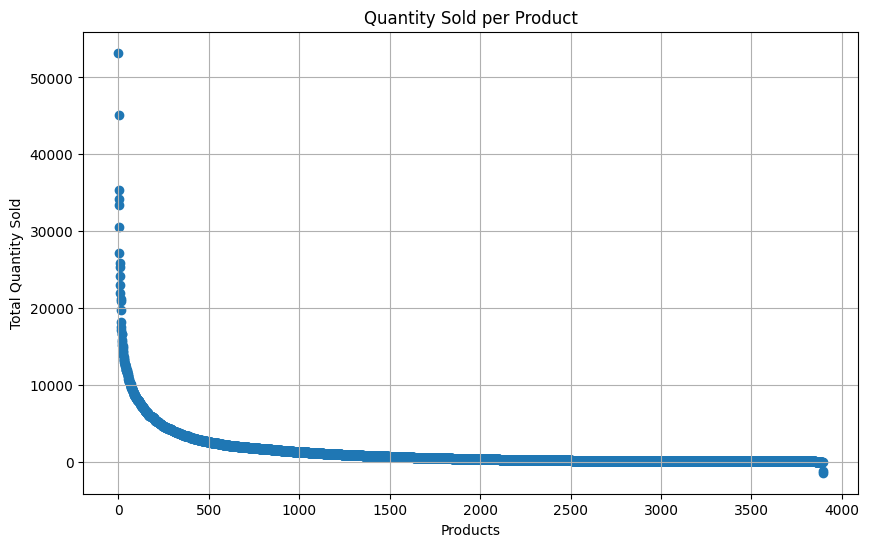

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(Quantity_per_Product)),Quantity_per_Product.values)
plt.xlabel('Products')
plt.ylabel('Total Quantity Sold')
plt.title('Quantity Sold per Product')
plt.grid(True)
plt.show()

### Display the above information as Bar plot

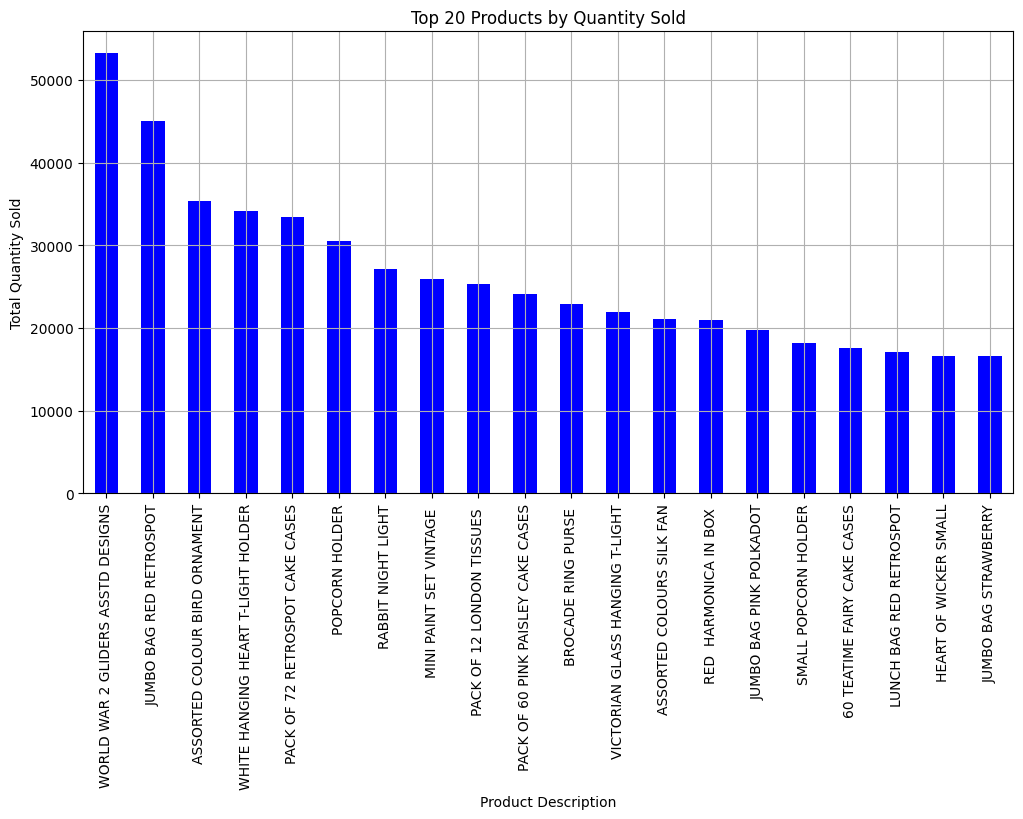

In [14]:
Quantity_per_Product.head(20).plot(kind='bar', color='blue',figsize=(12,6))
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 20 Products by Quantity Sold')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Find which invoice has maximum number of Products

In [16]:
Product_count_per_invoice =(df.groupby('InvoiceNo')['StockCode'].count().sort_values(ascending=False))
Product_count_per_invoice.head()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
Name: StockCode, dtype: int64

### Display the above information as Bar plot

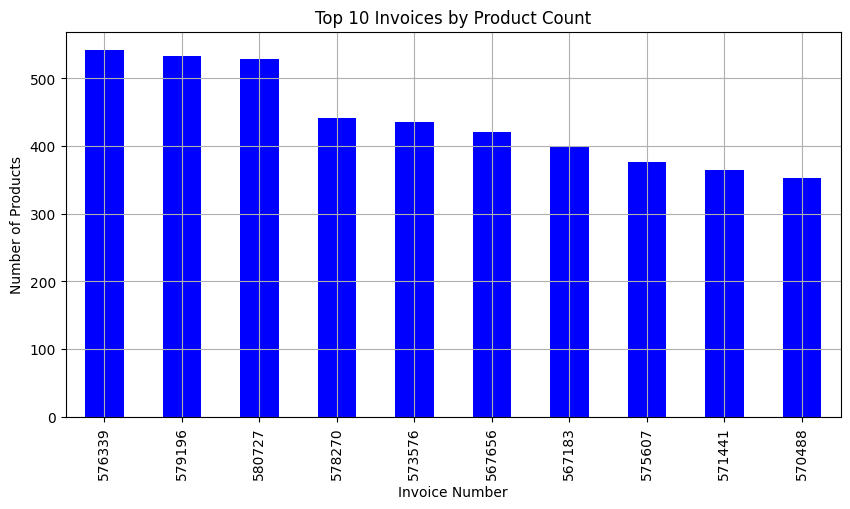

In [18]:
Product_count_per_invoice.head(10).plot(kind='bar', color='blue',figsize=(10,5))
plt.xlabel('Invoice Number')
plt.ylabel('Number of Products')
plt.title('Top 10 Invoices by Product Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Identify the top 10 customers who have made the highest number of product purchases

In [19]:
Product_count_per_customer=(df.groupby('CustomerID')['StockCode'].count().sort_values(ascending=False).head(10))
Product_count_per_customer

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: StockCode, dtype: int64

### Display the above information with Bar plot





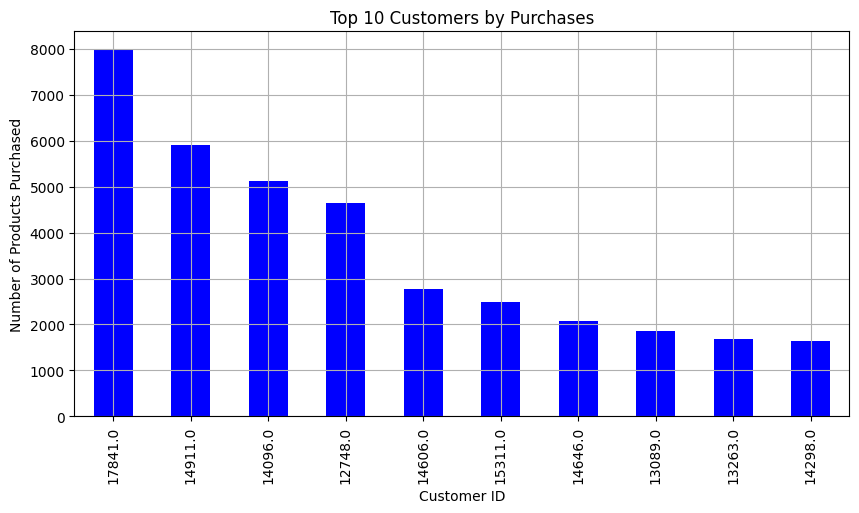

In [21]:
Product_count_per_customer.plot(kind='bar', color='blue', figsize=(10,5))
plt.xlabel('Customer ID')
plt.ylabel('Number of Products Purchased')
plt.title('Top 10 Customers by Purchases')
plt.grid(True)
plt.show()



### Item based Collaborative Filtering

#### Construct Cutomer -item Matrix

In [22]:
customer_item_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
)

### Change the matrix as binary(0s and 1s)

In [23]:
customer_item_matrix = customer_item_matrix.map(lambda x: 1 if x > 0 else 0 )

#### Identify the total number of items purchased by the customer "12481.0" along with the item description

In [25]:
items = customer_item_matrix.loc[12481.0 ]
stock_codes=items[items ==1].index.tolist()
stock_to_desc = df.drop_duplicates('StockCode').set_index('StockCode')['Description']

descriptions = stock_to_desc.loc[ stock_codes].tolist()
descriptions

['ASSORTED COLOURS SILK FAN',
 'WOODLAND CHARLOTTE BAG',
 '12 PENCILS TALL TUBE WOODLAND',
 'LAVENDER SCENTED FABRIC HEART',
 'RETROSPOT CHILDRENS APRON',
 'BLUE POLKADOT EGG CUP ',
 'BLUE POLKADOT COFFEE MUG',
 'RIDGED GLASS POSY VASE ',
 'WOODLAND  STICKERS',
 'RED TOADSTOOL LED NIGHT LIGHT',
 'POLKADOT RAIN HAT ',
 'RAIN PONCHO RETROSPOT',
 'VINTAGE HEADS AND TAILS CARD GAME ',
 'RED RETROSPOT TAPE',
 'STARS GIFT TAPE ',
 'POTTING SHED TWINE',
 'BLUE HARMONICA IN BOX ',
 'RED  HARMONICA IN BOX ',
 'SET 12 RETRO WHITE CHALK STICKS',
 'SET 12 KIDS  WHITE CHALK STICKS',
 'SET 12 KIDS COLOUR  CHALK STICKS',
 'PACK OF 60 MUSHROOM CAKE CASES',
 'PACK OF 12 WOODLAND TISSUES ',
 'ROBOT BIRTHDAY CARD',
 '6 RIBBONS RUSTIC CHARM',
 'RIBBON REEL POLKADOTS ',
 'BAKING SET 9 PIECE RETROSPOT ',
 'RETROSPOT TEA SET CERAMIC 11 PC ',
 'VICTORIAN GLASS HANGING T-LIGHT',
 'IVORY DINER WALL CLOCK',
 'BLUE DINER WALL CLOCK',
 'MILK PAN RED RETROSPOT',
 'CAKE STAND WHITE TWO TIER LACE',
 'HAIRCLIPS FORTIE

### Construct Item-to-Item Similarity Matrix

In [26]:
item_item_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix.T),
    index=customer_item_matrix.columns,
    columns=customer_item_matrix.columns
)

Assign column, row names for the matrix

In [35]:
item_item_sim_matrix.columns = customer_item_matrix.columns
item_item_sim_matrix.index =customer_item_matrix.columns

#### Making Recommendations

Identify pairs of products exhibit the highest item-to-item similarity after removing self-similarity and perfect matches

In [31]:
import numpy as np

# Make a copy of the similarity matrix
item_item_sim_matrix_no_diag =item_item_sim_matrix.copy()

# Exclude diagonal values and values equal to 1
np.fill_diagonal(item_item_sim_matrix_no_diag.values, np.nan)  # Exclude diagonal


# Flatten the matrix and sort values in descending order
top_values = item_item_sim_matrix_no_diag.stack().sort_values(ascending=False)

#top_10 = top_values.head(10)
top_10=top_values.head(10)

# Display the top 10 values and their indices
print("Top 10 Values and Their Indices:")
print(top_10)

Top 10 Values and Their Indices:
StockCode  StockCode
90214J     90214M       1.0
90214M     90214J       1.0
90060B     90035A       1.0
90163B     90138        1.0
90214W     90214U       1.0
85170A     21895        1.0
90024F     90024C       1.0
90214W     90214O       1.0
90001A     90026A       1.0
90131      90036F       1.0
dtype: float64


#### For product 21988, find the 10 most similar products based on the item-item similarity matrix

In [32]:
top_10_similar_items =(
        item_item_sim_matrix[21988]
    .sort_values(ascending=False)
    .iloc[1:11]
)
top_10_similar_items

StockCode
21987    0.937472
21989    0.776708
21086    0.492789
21094    0.490859
22332    0.446081
22437    0.428890
21207    0.416415
22333    0.347534
21080    0.323005
21213    0.312840
Name: 21988, dtype: float64

#### product descriptions of the top 10 items most similar to item 21988

In [33]:
df.loc[
    df['StockCode'].isin(top_10_similar_items.index),
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items.index]

,Description
StockCode,
21987,PACK OF 6 SKULL PAPER CUPS
21989,PACK OF 20 SKULL PAPER NAPKINS
21086,SET/6 RED SPOTTY PAPER CUPS
21094,SET/6 RED SPOTTY PAPER PLATES
22332,SKULLS PARTY BAG + STICKER SET
22437,SET OF 9 BLACK SKULL BALLOONS
21207,SKULL AND CROSSBONES GARLAND
22333,RETROSPOT PARTY BAG + STICKER SET
21080,SET/20 RED RETROSPOT PAPER NAPKINS
